In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df=pd.read_csv("titanic.csv")
print("Number of records in the dataset : "+str(len(df.index)))
df.head()

Number of records in the dataset : 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
age_wrangled=df[pd.notnull(df['Age'])]
embark_wrangled=age_wrangled[pd.notnull(age_wrangled["Embarked"])]
print("Number of passengers in age wrangled " + str(len(age_wrangled.index)))
print("Number of passengers in age and embark wrangled " + str(len(embark_wrangled.index)))

Number of passengers in age wrangled 714
Number of passengers in age and embark wrangled 712


In [5]:
#Group data by gender
gender_data=embark_wrangled.groupby('Sex', as_index=False)
gender_mean_data=gender_data.mean()
print("Total survival Rate:" +str(embark_wrangled["Survived"].mean()))
print("\nMean Data by Gender")
print(gender_mean_data[["Sex","Survived","Age","Pclass","SibSp","Parch","Fare"]])

Total survival Rate:0.4044943820224719

Mean Data by Gender
      Sex  Survived        Age    Pclass     SibSp     Parch       Fare
0  female  0.752896  27.745174  2.073359  0.644788  0.714286  47.332433
1    male  0.205298  30.726645  2.335541  0.439294  0.271523  27.268836


In [6]:
total_df=gender_data["PassengerId"].count()
print(total_df)
total_df.columns=["Sex","Total"]
gender_list=total_df["Sex"]
del total_df["Sex"]
gender_survived_df=gender_data["Survived"].sum()
del gender_survived_df["Sex"]
combined_df=total_df.add(gender_survived_df,fill_value=0)
print(combined_df)

      Sex  PassengerId
0  female          259
1    male          453
   Survived  Total
0     195.0  259.0
1      93.0  453.0


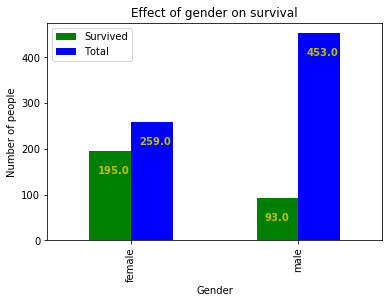

In [8]:
combined_df.plot.bar(color=["green","blue"])
plt.title("Effect of gender on survival")
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.xticks(range(len(gender_list)),gender_list)
survival_gender_list=[combined_df.loc[0]["Survived"],combined_df.loc[1]["Survived"]]
total_gender_list=[combined_df.loc[0]["Total"],combined_df.loc[1]["Total"]]

#Define function to create value labels on plots
def create_value_labels(list_data,decimals,x_adjust,y_adjust):
    for x,y in enumerate(list_data):
        plt.text(x + x_adjust, y + y_adjust, round(list_data[x],decimals),color="y", fontweight="bold")
        
create_value_labels(survival_gender_list, 1,-0.2,-50)
create_value_labels(total_gender_list,1,0.05,-50)
plt.show()
